In [1202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import crypto_tools as cpt
import importlib
importlib.reload(cpt)

<module 'crypto_tools' from '/Users/kevinpark/Desktop/git/Crypto/crypto_tools.py'>

In [1204]:
crypto_prices = cpt.get_top_coins(top_n=10).ffill()
crypto_index = cpt.get_cd_crypto_index(start_date_str='2000-01-01', end_date_str='2024-12-31')
prices_df = crypto_prices.merge(crypto_index.index_close, how='left', on='Date')

non_crypto_list = ['SP500','DJI','ND100','USDTUSD','USDCUSD','USDTKRW','USDCKRW','USDKRW','MSTR','GLD']
crypto_list = crypto_prices.columns[~crypto_prices.columns.isin(non_crypto_list)].tolist()

{'^GSPC': 'SP500', '^DJI': 'DJI', '^NDX': 'ND100', 'USDT-USD': 'USDTUSD', 'USDC-USD': 'USDCUSD', 'USDT-KRW': 'USDTKRW', 'USDC-KRW': 'USDCKRW', 'KRW=X': 'USDKRW', 'MSTR': 'MSTR', 'GLD': 'GLD', 'BTC-USD': 'BTC_USD', 'ETH-USD': 'ETH_USD', 'XRP-USD': 'XRP_USD', 'BNB-USD': 'BNB_USD', 'SOL-USD': 'SOL_USD', 'ADA-USD': 'ADA_USD', 'TRX-USD': 'TRX_USD', 'AVAX-USD': 'AVAX_USD', 'TON-USD': 'TON_USD', 'LINK-USD': 'LINK_USD'}


[*********************100%%**********************]  20 of 20 completed


2017-12-30 00:00:00 2024-12-31 00:00:00


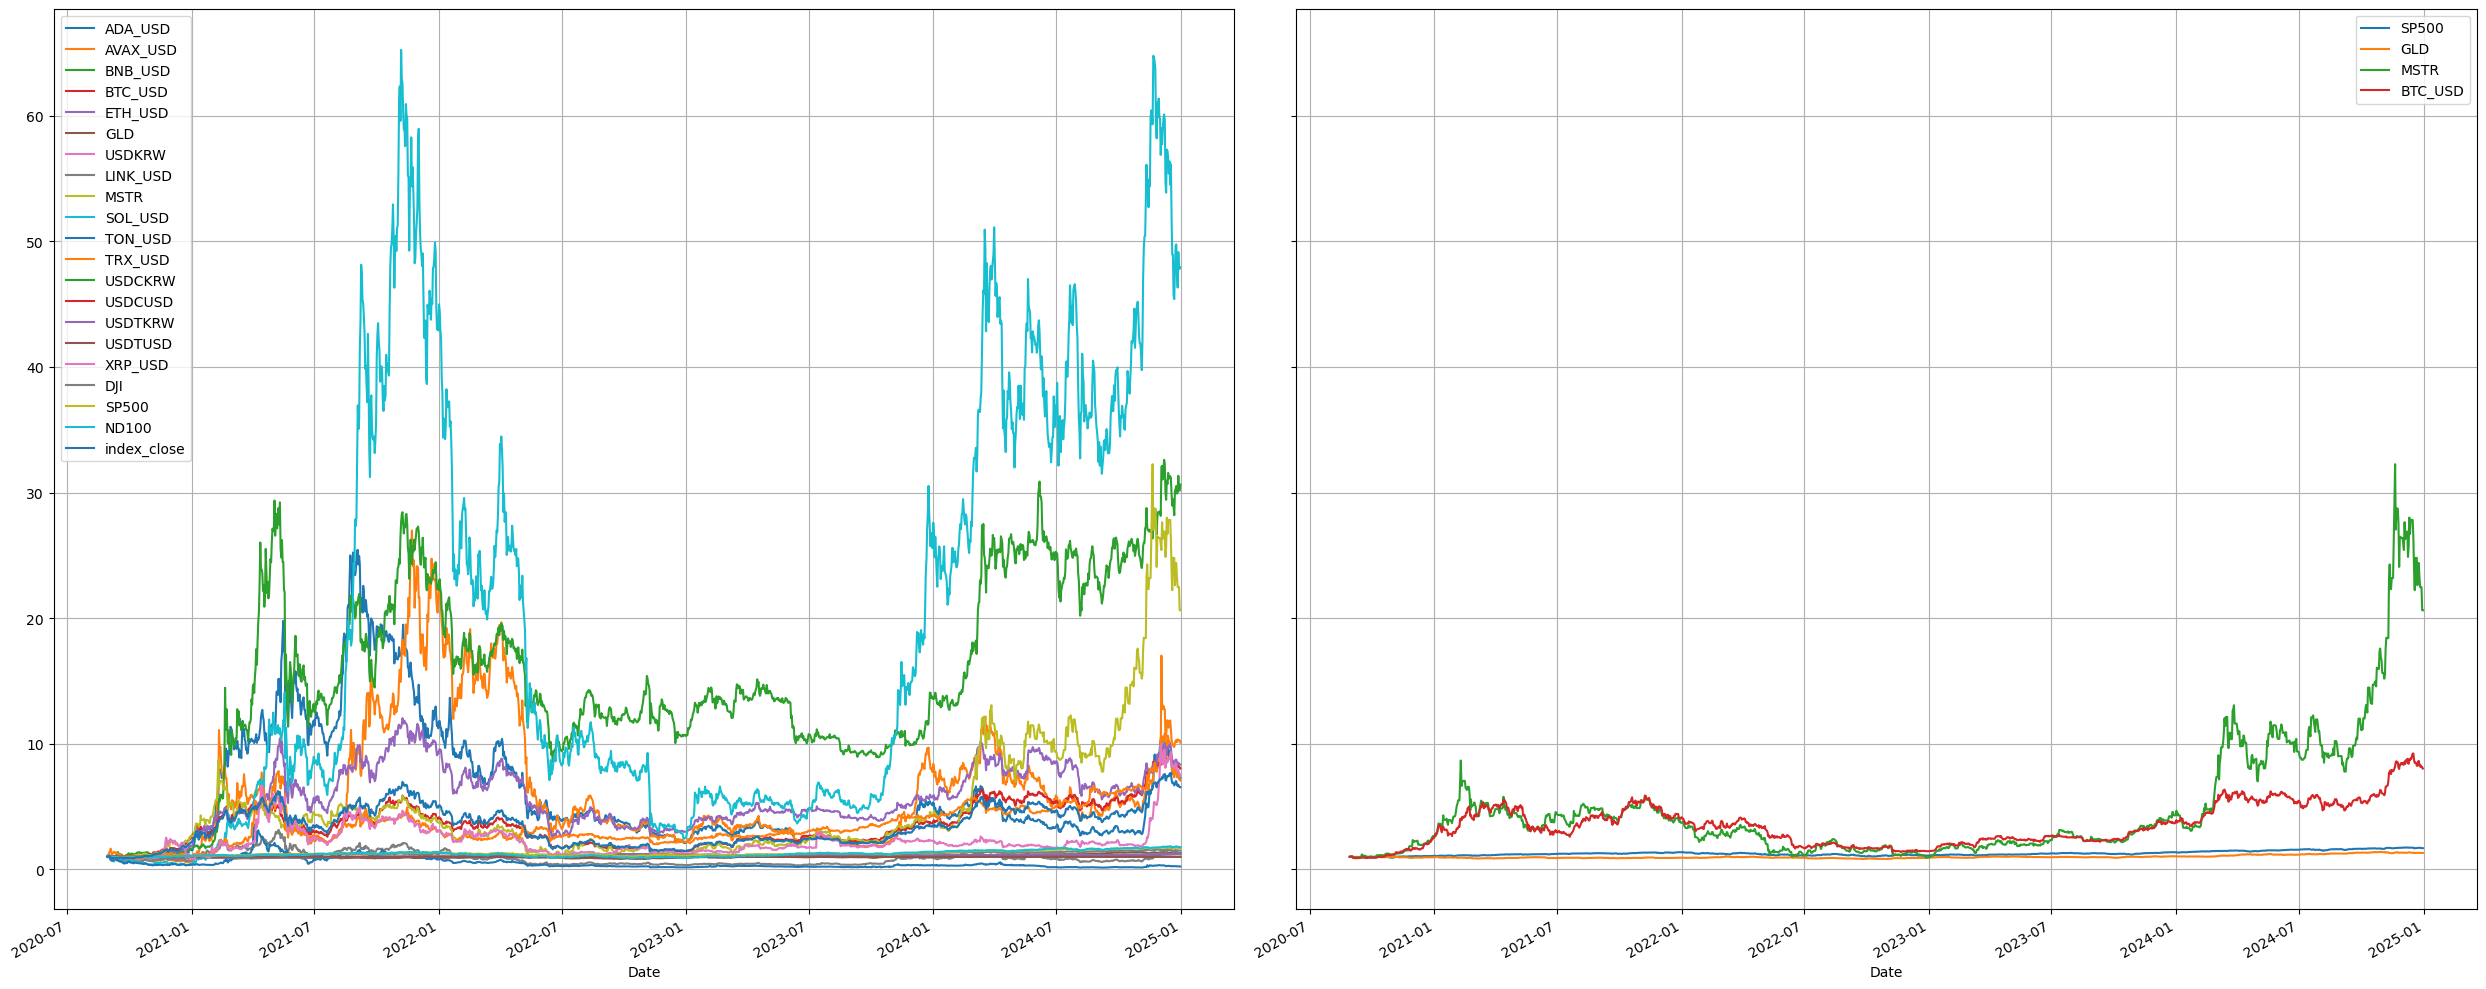

In [1205]:
returns = prices_df.dropna().pct_change()[1:]
normalized_price = prices_df.dropna() / prices_df.dropna().iloc[0]

fig,ax = plt.subplots(1,2, figsize=(25,10), sharey=True)
normalized_price.plot(ax=ax[0]);

normalized_price.SP500.plot(label='SP500', ax=ax[1])
normalized_price.GLD.plot(label='GLD', ax=ax[1])
normalized_price.MSTR.plot(label='MSTR', ax=ax[1])
normalized_price.BTC_USD.plot(label='BTC_USD', ax=ax[1])

for i in range(len(ax)):
    ax[i].grid()
    ax[i].legend()
plt.tight_layout();

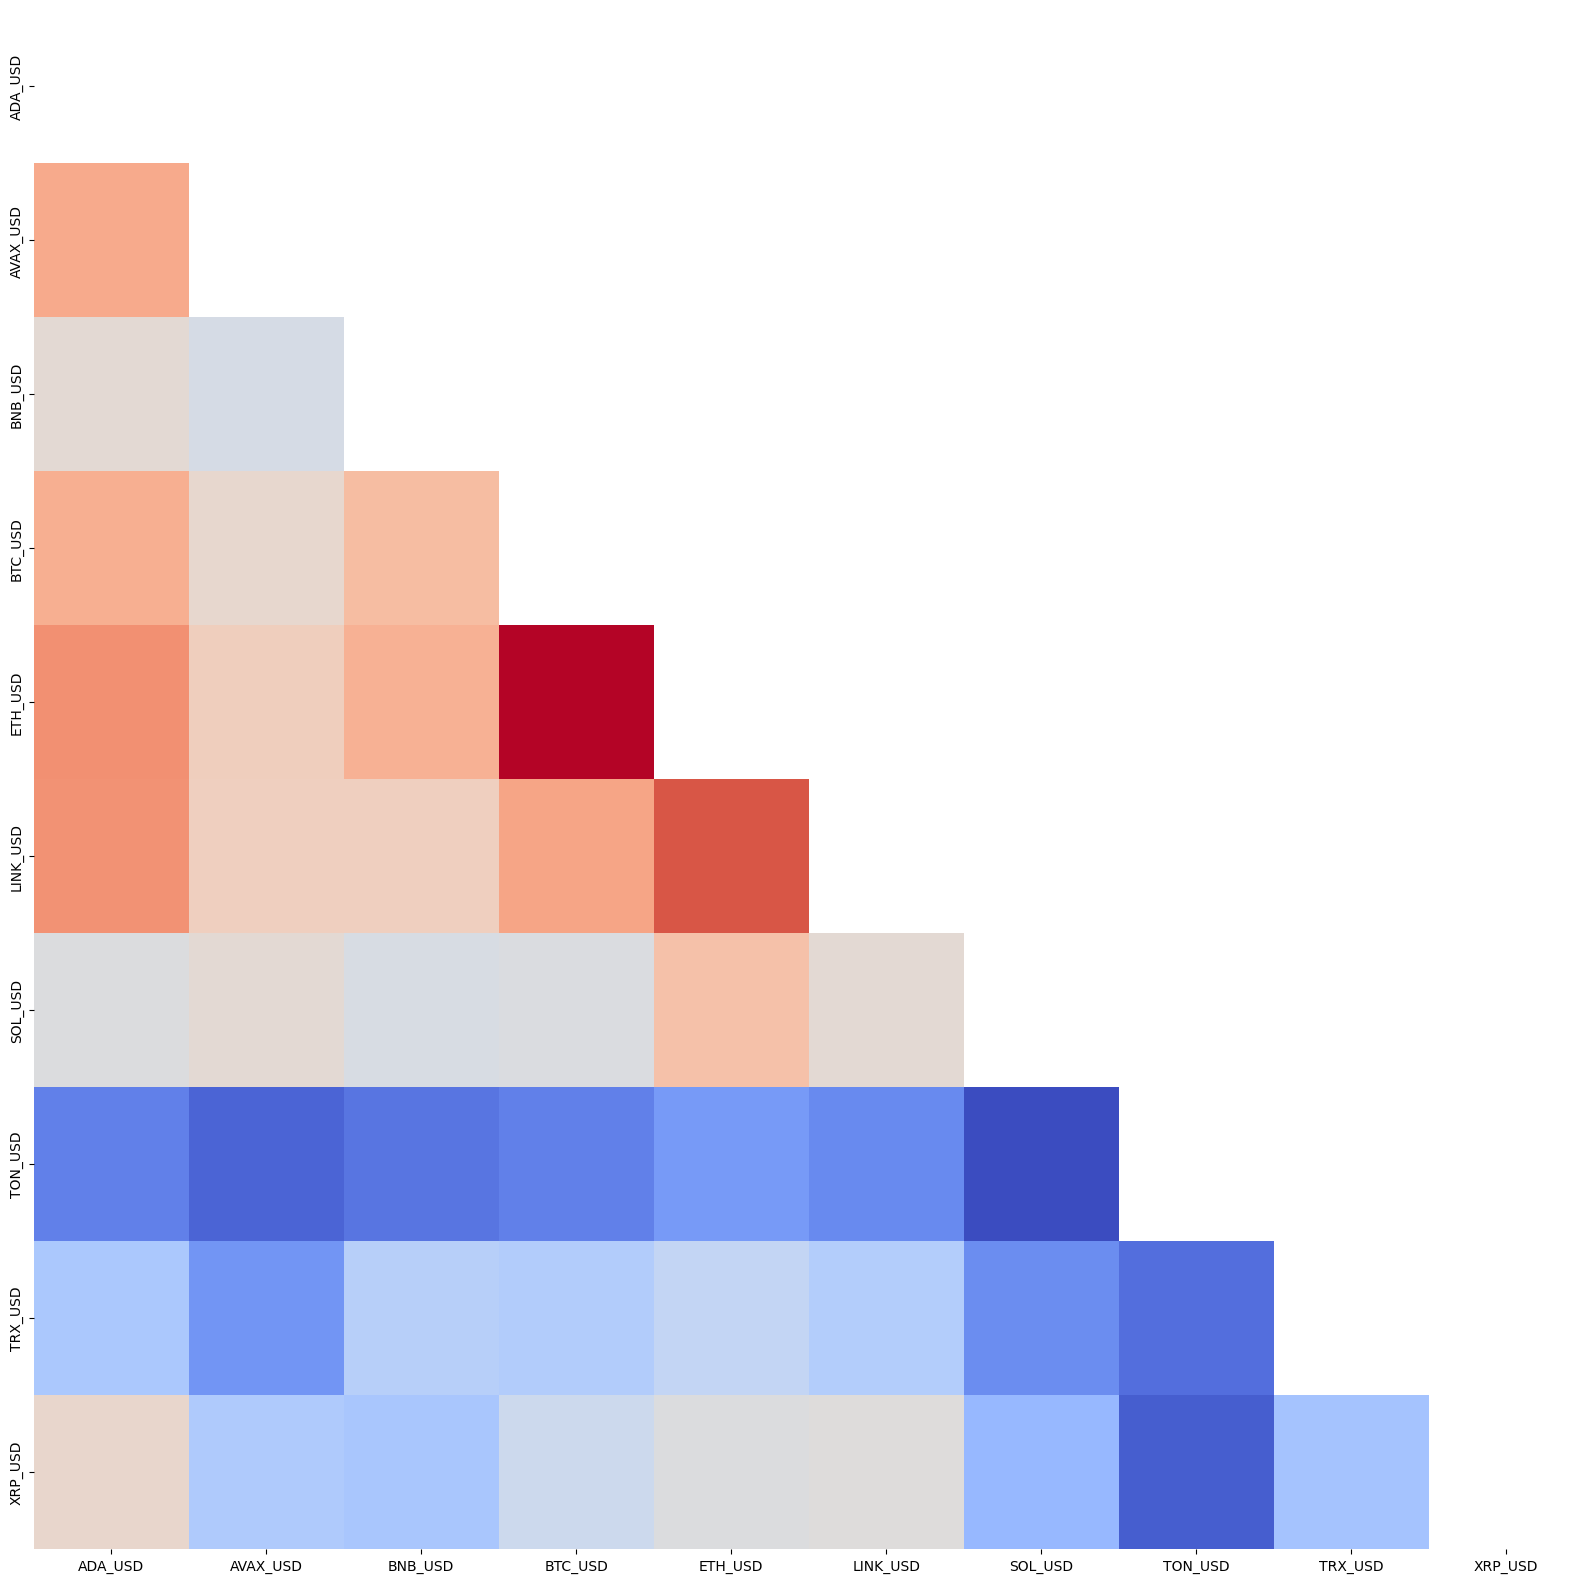

In [1206]:
fig,ax = plt.subplots(figsize=(20,20))
crypto_corrmat = cpt.plot_corr_mat(returns[crypto_list], ax=ax)

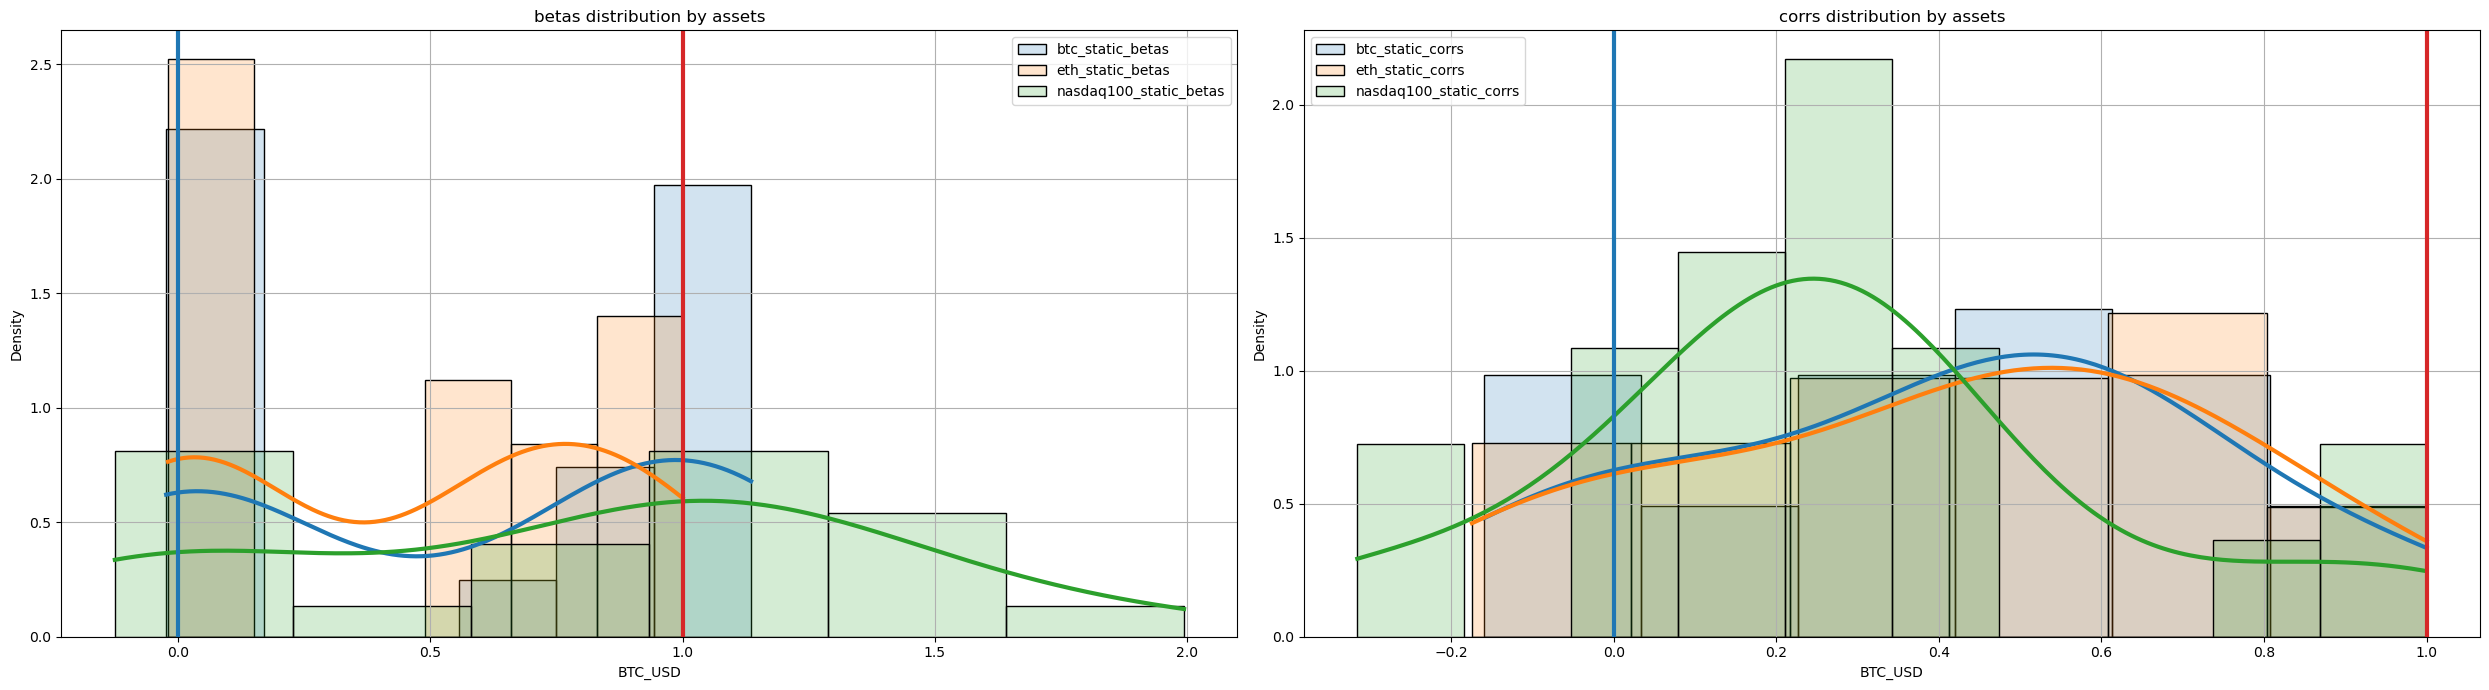

In [1207]:
btc_static_betas = cpt.vectorized_beta(returns.dropna(), market_definition='BTC_USD')
eth_static_betas = cpt.vectorized_beta(returns.dropna(), market_definition='ETH_USD')
nasdaq100_static_betas = cpt.vectorized_beta(returns.dropna(), market_definition='ND100')

btc_static_corrs = cpt.vectorized_corr(returns.dropna(), market_definition='BTC_USD')
eth_static_corrs = cpt.vectorized_corr(returns.dropna(), market_definition='ETH_USD')
nasdaq100_static_corrs = cpt.vectorized_corr(returns.dropna(), market_definition='ND100')

fig,ax = plt.subplots(1,2, figsize=(25,7))
# plot beta distributions
sns.histplot(btc_static_betas, kde=True, alpha=0.2, ax=ax[0], stat='density', line_kws={'lw':3}, label='btc_static_betas')
sns.histplot(eth_static_betas, kde=True, alpha=0.2, ax=ax[0], stat='density', line_kws={'lw':3}, label='eth_static_betas')
sns.histplot(nasdaq100_static_betas, kde=True, alpha=0.2, ax=ax[0], stat='density', line_kws={'lw':3}, label='nasdaq100_static_betas')
ax[0].set_title('betas distribution by assets')

# plot correlation distributions
sns.histplot(btc_static_corrs, kde=True, alpha=0.2, ax=ax[1], stat='density', line_kws={'lw':3}, label='btc_static_corrs')
sns.histplot(eth_static_corrs, kde=True, alpha=0.2, ax=ax[1], stat='density', line_kws={'lw':3}, label='eth_static_corrs')
sns.histplot(nasdaq100_static_corrs, kde=True, alpha=0.2, ax=ax[1], stat='density', line_kws={'lw':3}, label='nasdaq100_static_corrs')
ax[1].set_title('corrs distribution by assets')

for i in range(len(ax)):
    ax[i].axvline(1, c='tab:red', lw=3);
    ax[i].axvline(0, c='tab:blue', lw=3);
    ax[i].grid()
    ax[i].legend()
plt.tight_layout();

crypto_rolling_betas mean 0.6776113926689045
crypto_rolling_corrs mean 0.4439254120897822
crypto_rolling_betas mean MSTR 1.5648122711771375
crypto_rolling_corrs mean MSTR 0.6970340168261125


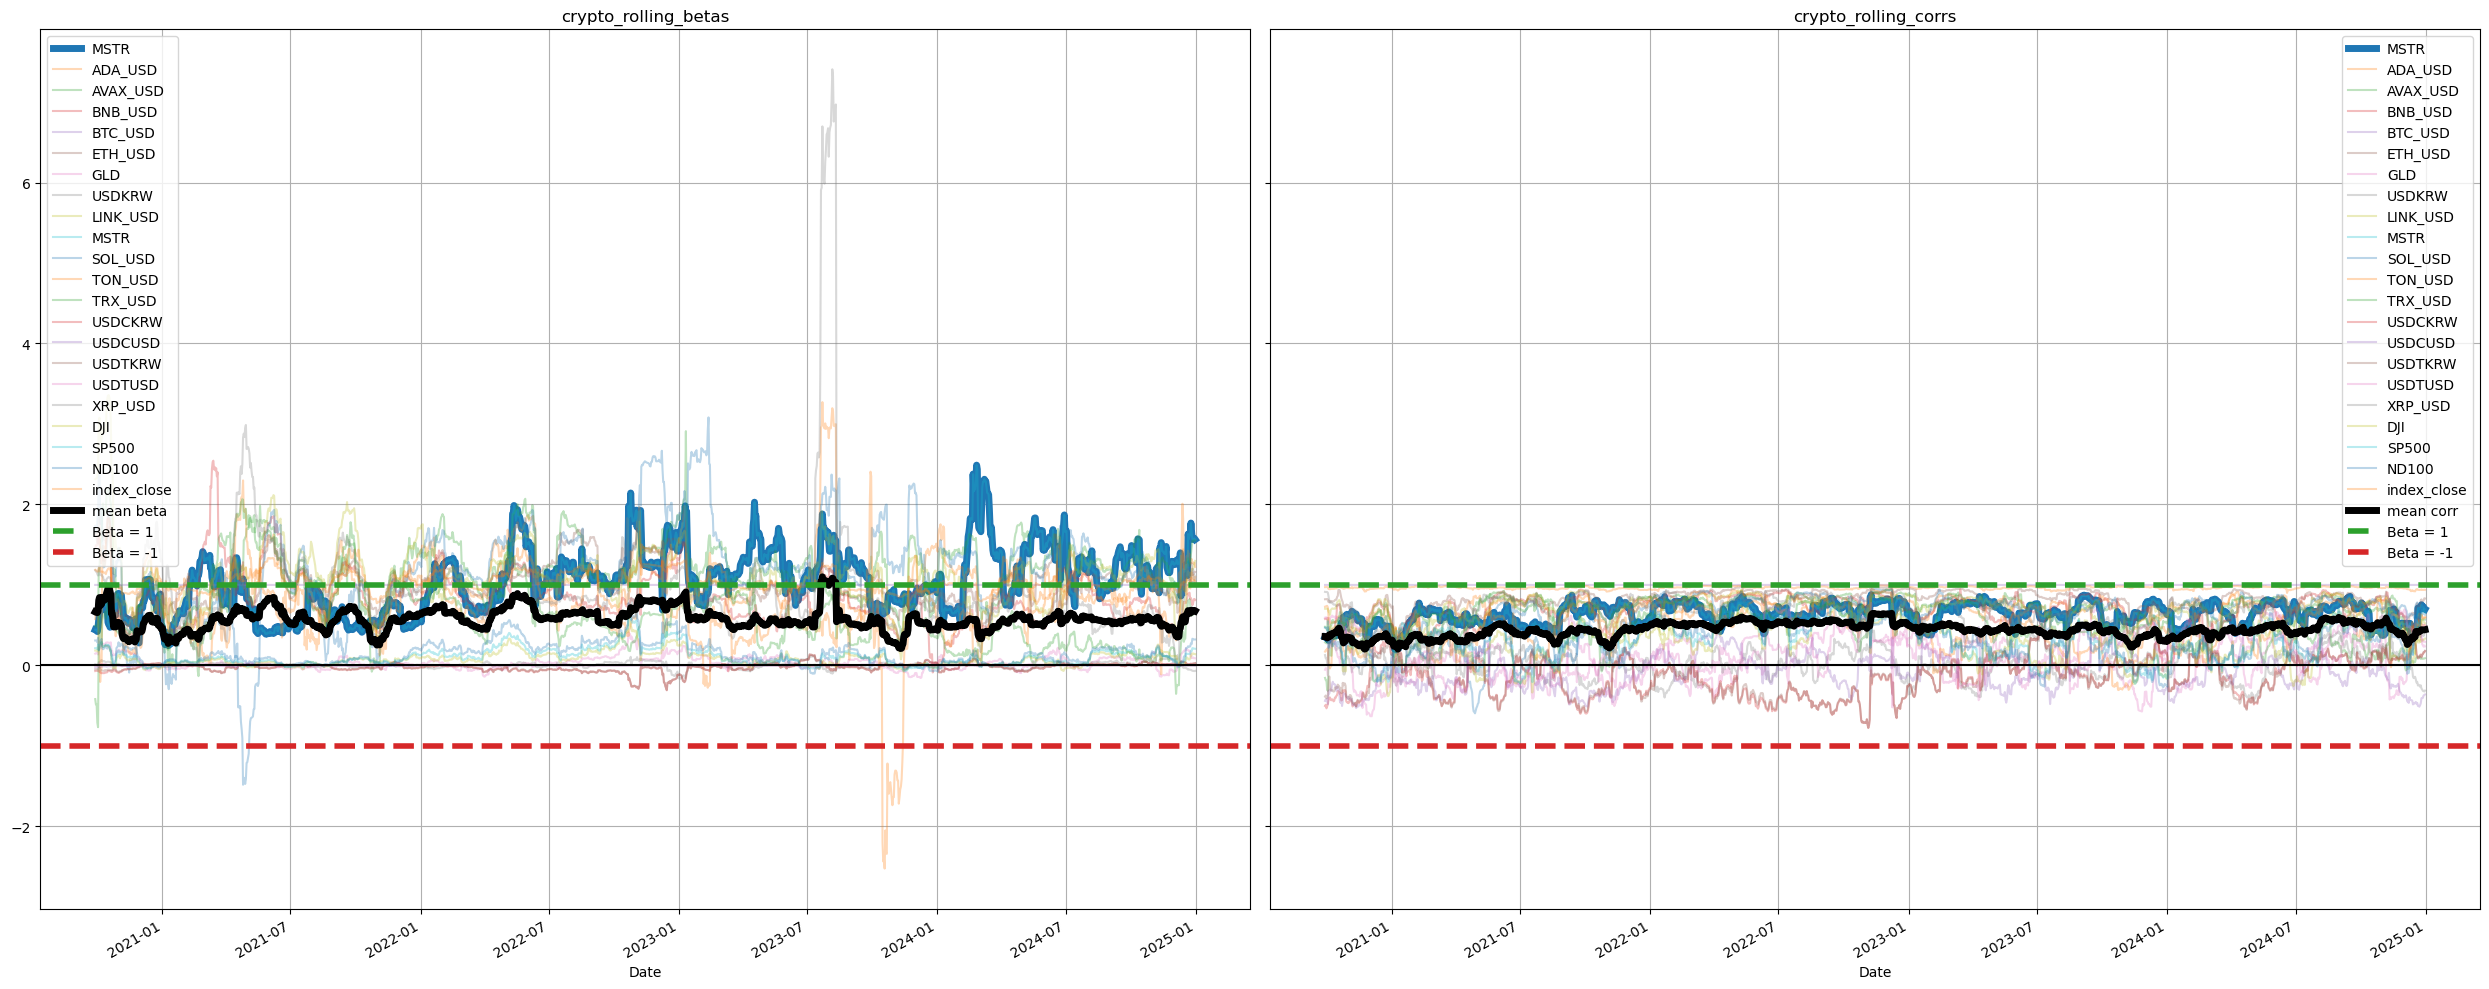

In [1208]:
market='BTC_USD'
window=30
select_assets = 'MSTR'

# rolling betas
crypto_rolling_betas = cpt.vectorized_rolling_calc(returns.dropna(), market_definition=market, window_size=window, beta=True)
# rolling corrs
crypto_rolling_corrs = cpt.vectorized_rolling_calc(returns.dropna(), market_definition=market, window_size=window, beta=False)

fig,ax = plt.subplots(1,2, figsize=(25, 10), sharey=True)
crypto_rolling_betas[select_assets].dropna().plot(ax=ax[0], legend=False, title=f'crypto_rolling_betas {select_assets}', lw=5)
crypto_rolling_betas.dropna().plot(ax=ax[0], legend=False, title=f'crypto_rolling_betas', alpha=0.3)
crypto_rolling_betas.dropna().mean(axis=1).plot(ax=ax[0], label='mean beta', c='black', lw=5)

crypto_rolling_corrs[select_assets].dropna().plot(ax=ax[1], legend=False, title=f'crypto_rolling_corrs {select_assets}', lw=5)
crypto_rolling_corrs.dropna().plot(ax=ax[1], legend=False, title=f'crypto_rolling_corrs', alpha=0.3)
crypto_rolling_corrs.dropna().mean(axis=1).plot(ax=ax[1], label='mean corr', c='black', lw=5)

for i in range(len(ax)):
    ax[i].axhline(1, color='tab:green', linewidth=4, label='Beta = 1', ls='--')
    ax[i].axhline(-1, color='tab:red', linewidth=4, label='Beta = -1', ls='--')
    ax[i].axhline(0, color='black')
    ax[i].grid()
    ax[i].legend()
plt.tight_layout();

print('crypto_rolling_betas mean', crypto_rolling_betas.dropna().mean(axis=1).iloc[-1])
print('crypto_rolling_corrs mean', crypto_rolling_corrs.dropna().mean(axis=1).iloc[-1])
print(f'crypto_rolling_betas mean {select_assets}', crypto_rolling_betas[select_assets].dropna().iloc[-1])
print(f'crypto_rolling_corrs mean {select_assets}', crypto_rolling_corrs[select_assets].dropna().iloc[-1])

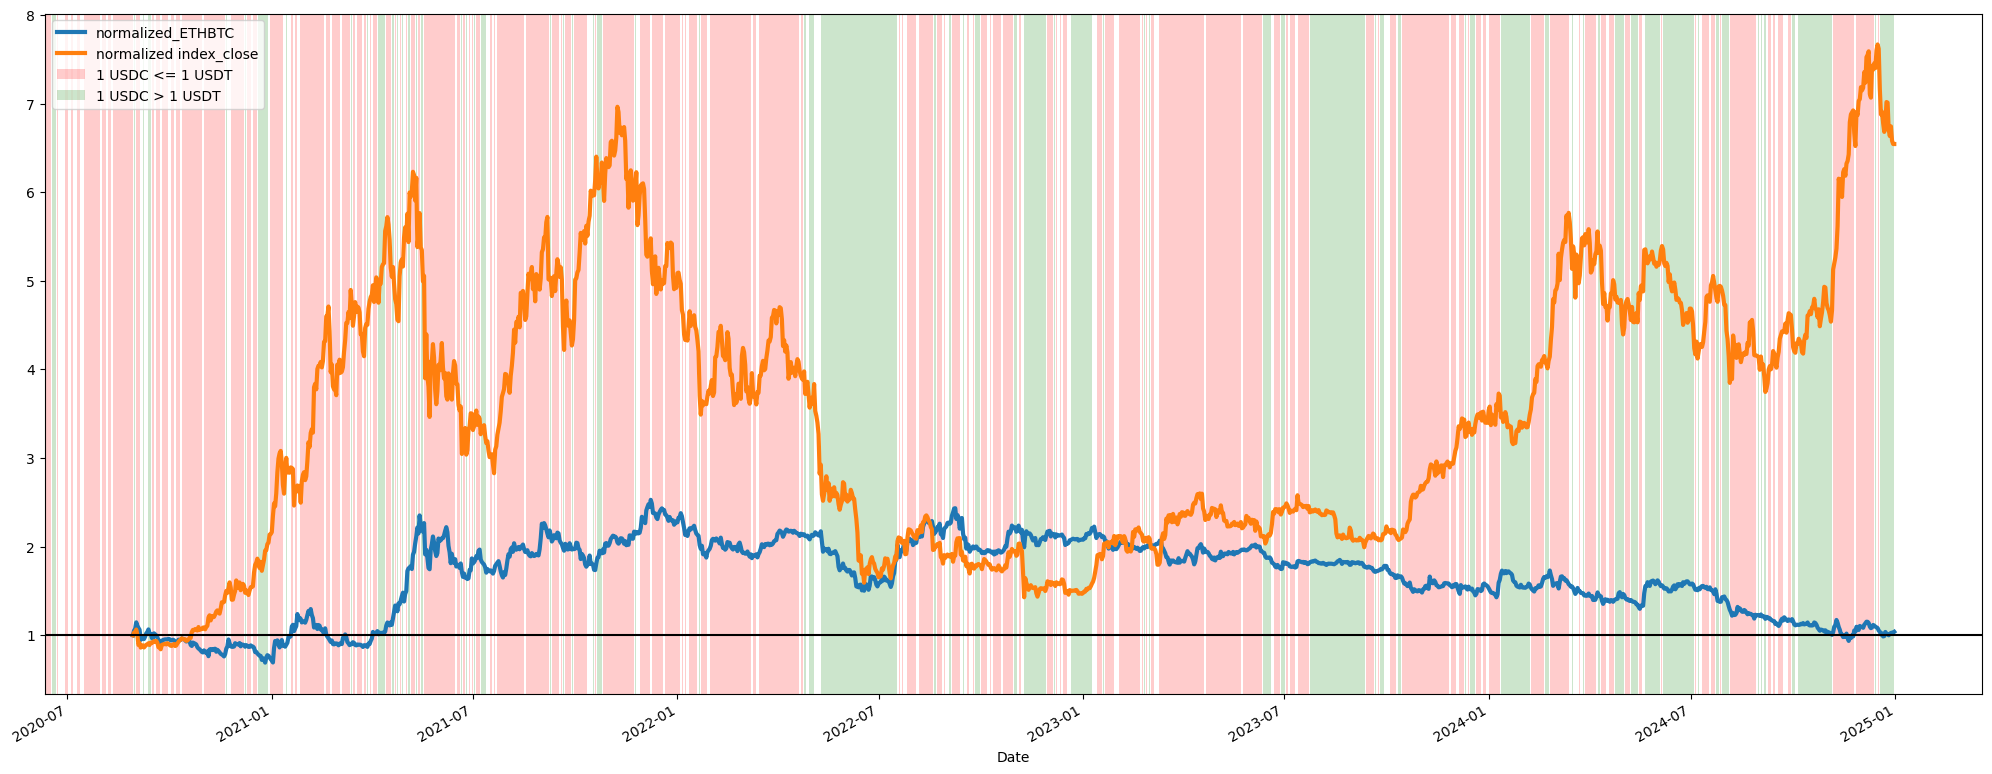

In [1209]:
usdc_usdt = (crypto_prices.USDCUSD/crypto_prices.USDTUSD).dropna()
usdc_premium = (crypto_prices.USDCUSD - crypto_prices.USDTUSD).dropna() * 10_000 # in bps
normalized_ETHBTC = (normalized_price.ETH_USD / normalized_price.BTC_USD).dropna()

fig,ax = plt.subplots(figsize=(25,10))
normalized_ETHBTC.plot(ax=ax, lw=3, label='normalized_ETHBTC')
normalized_price.index_close.plot(ax=ax, lw=3, label='normalized index_close')
#usdc_premium.plot(ax=ax)
ax.axhline(1, c='black');
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.set_ylim(ylim[0], ylim[1])
ax.set_xlim(xlim[0], xlim[1])
ax.fill_between(x=usdc_premium.index, y1=ylim[0], y2=ylim[1], 
                where=(usdc_premium <= 0), facecolor='r', alpha=0.2, label='1 USDC <= 1 USDT')
ax.fill_between(x=usdc_premium.index, y1=ylim[0], y2=ylim[1], 
                where=(usdc_premium > 0), facecolor='g', alpha=0.2, label='1 USDC > 1 USDT')
ax.legend();

In [1210]:
# crypto_prices.USDTKRW.plot()
# crypto_prices.USDCKRW.plot()
# crypto_prices.USDKRW.plot()

In [1211]:
start_date = '2024-01-01 00:00:00'
end_date = '2024-12-31 00:00:00'

exchange='binance'
# binance spot & perp
binance_btc_usdt_spot = cpt.long_query(cpt.get_prices, start_date, end_date, exchange, symbol='BTC/USDT', defaultType='spot', freq_hr=8, max_data_len=1500, mute=True)
binance_eth_usdt_spot = cpt.long_query(cpt.get_prices, start_date, end_date, exchange, symbol='ETH/USDT', defaultType='spot', freq_hr=8, max_data_len=1500, mute=True)
binance_usdc_usdt_spot = cpt.long_query(cpt.get_prices, start_date, end_date, exchange, symbol='USDC/USDT', defaultType='spot', freq_hr=8, max_data_len=1500, mute=True)
binance_btc_usdt_perp = cpt.long_query(cpt.get_prices, start_date, end_date, exchange, symbol='BTC/USDT:USDT', defaultType='future', freq_hr=8, max_data_len=1500, mute=True)
binance_eth_usdt_perp = cpt.long_query(cpt.get_prices, start_date, end_date, exchange, symbol='ETH/USDT:USDT', defaultType='future', freq_hr=8, max_data_len=1500, mute=True)

# binance perp funding fee
binance_btc_usdt_funding_fee = cpt.long_query(cpt.get_funding_rates, start_date, end_date, exchange, symbol='BTC/USDT:USDT', freq_hr=8, max_data_len=700, mute=True)
binance_eth_usdt_funding_fee = cpt.long_query(cpt.get_funding_rates, start_date, end_date, exchange, symbol='ETH/USDT:USDT', freq_hr=8, max_data_len=700, mute=True)

# upbit spot
exchange='upbit'
# upbit_btc_usdt_spot = cpt.long_query(cpt.get_prices, start_date, end_date, exchange, symbol='BTC/KRW', defaultType=None, freq_hr=8, max_data_len=1500, mute=True)
# upbit_eth_usdt_spot = cpt.long_query(cpt.get_prices, start_date, end_date, exchange, symbol='ETH/KRW', defaultType=None, freq_hr=8, max_data_len=1500, mute=True)

futures_beta: 1.0048509944516946 futures_corr: 0.9999348298076698


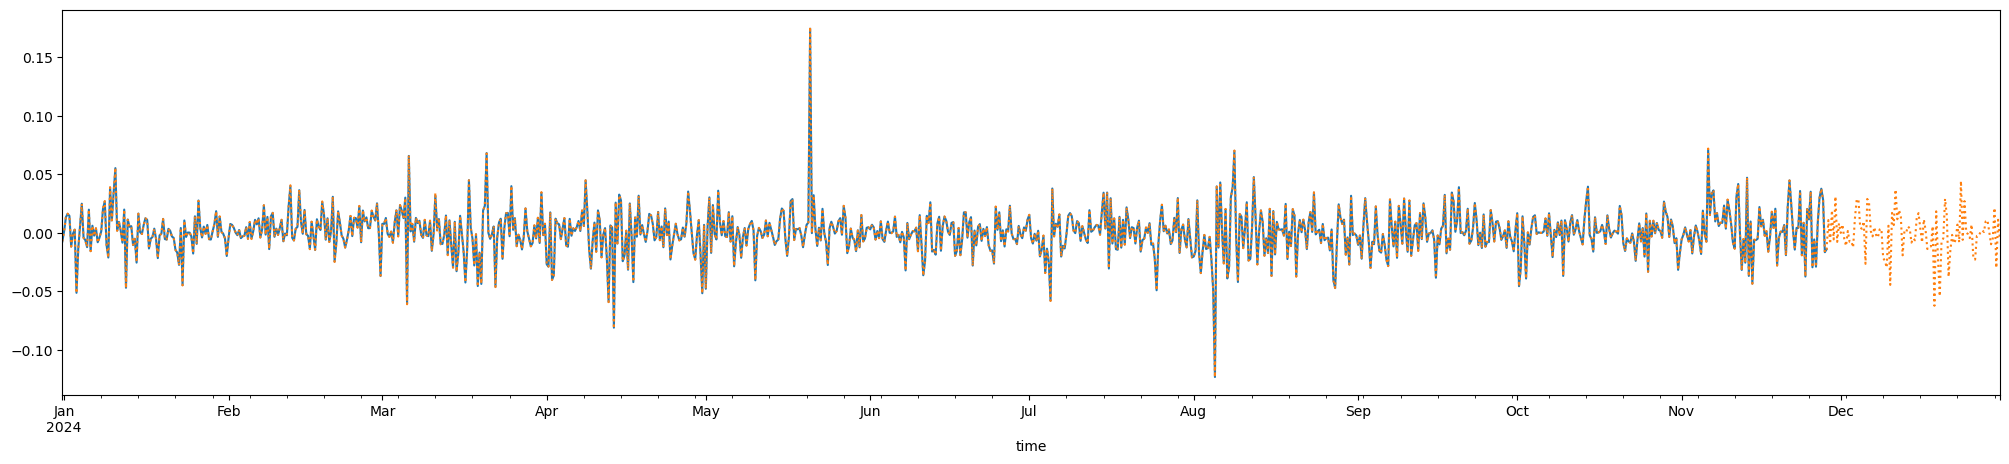

In [1213]:
spot_returns = binance_eth_usdt_spot.close.pct_change()[1:]
perp_returns = binance_eth_usdt_perp.close.pct_change()[1:]
futures_beta = spot_returns.cov(perp_returns) / perp_returns.var()
futures_corr = spot_returns.corr(perp_returns)
print(f'futures_beta: {futures_beta}', f'futures_corr: {futures_corr}')

fig,ax = plt.subplots(figsize=(25,5))
spot_returns.plot(ax=ax)
perp_returns.plot(ax=ax, ls=':');